In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('STB.csv')
#df1=df.reset_index()['Price']
df=df.reset_index()['Price']
df

0       11750
1       12550
2       12900
3       13300
4       13000
        ...  
1237    27000
1238    27400
1239    27000
1240    27200
1241    27850
Name: Price, Length: 1242, dtype: int64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 15s 576ms/step - loss: 0.0081 - val_loss: 0.0950
Epoch 2/100
9/9 [==============================] - 3s 304ms/step - loss: 0.0017 - val_loss: 0.1855
Epoch 3/100
9/9 [==============================] - 3s 310ms/step - loss: 0.0011 - val_loss: 0.1242
Epoch 4/100
9/9 [==============================] - 3s 361ms/step - loss: 9.0737e-04 - val_loss: 0.1389
Epoch 5/100
9/9 [==============================] - 3s 336ms/step - loss: 8.0211e-04 - val_loss: 0.0902
Epoch 6/100
9/9 [==============================] - 3s 341ms/step - loss: 6.7595e-04 - val_loss: 0.0695
Epoch 7/100
9/9 [==============================] - 3s 321ms/step - loss: 5.9318e-04 - val_loss: 0.0403
Epoch 8/100
9/9 [==============================] - 3s 320ms/step - loss: 5.5494e-04 - val_loss: 0.0134
Epoch 9/100
9/9 [==============================] - 3s 316ms/step - loss: 5.3363e-04 - val_loss: 0.0073
Epoch 10/100
9/9 [==============================] - 3s 316ms/step - loss: 4.8802e-04

Epoch 80/100
9/9 [==============================] - 2s 278ms/step - loss: 2.0596e-04 - val_loss: 0.0533
Epoch 81/100
9/9 [==============================] - 2s 278ms/step - loss: 1.9421e-04 - val_loss: 0.0574
Epoch 82/100
9/9 [==============================] - 2s 283ms/step - loss: 1.8986e-04 - val_loss: 0.0534
Epoch 83/100
9/9 [==============================] - 2s 282ms/step - loss: 2.0018e-04 - val_loss: 0.0507
Epoch 84/100
9/9 [==============================] - 2s 282ms/step - loss: 2.0036e-04 - val_loss: 0.0386
Epoch 85/100
9/9 [==============================] - 2s 281ms/step - loss: 1.8090e-04 - val_loss: 0.0429
Epoch 86/100
9/9 [==============================] - 3s 284ms/step - loss: 1.7813e-04 - val_loss: 0.0324
Epoch 87/100
9/9 [==============================] - 3s 284ms/step - loss: 1.7557e-04 - val_loss: 0.0363
Epoch 88/100
9/9 [==============================] - 2s 282ms/step - loss: 1.7461e-04 - val_loss: 0.0532
Epoch 89/100
9/9 [==============================] - 2s 279ms/ste

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 53ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 6217.769567770954
Testing RMSE: 11066.252928864702
Validation MAPE: 24.747770985342303
Testing MAPE: 41.379032562687165
Validation MAE: 5246.131431633417
Testing MAE: 9010.22576781999


In [17]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=188
i=0
while(i<30):

    if(len(temp_input)>188):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.63922942 0.63397548 0.62697023 0.6234676  0.60945709 0.61996497
 0.63397548 0.64273205 0.6234676  0.61471103 0.60770578 0.61295972
 0.60945709 0.60945709 0.5971979  0.58143608 0.57618214 0.55341506
 0.55166375 0.55166375 0.55166375 0.53064799 0.50087566 0.52014011
 0.5061296  0.51313485 0.49562172 0.46234676 0.46234676 0.45534151
 0.43432574 0.46584939 0.41681261 0.40105079 0.41856392 0.37478109
 0.33099825 0.33975482 0.29947461 0.3380035  0.36252189 0.36252189
 0.38003503 0.3642732  0.3502627  0.34500876 0.30297723 0.26444834
 0.26619965 0.26970228 0.30647986 0.30998249 0.30998249 0.33625219
 0.33625219 0.34851138 0.32574431 0.28721541 0.32049037 0.31348511
 0.27495622 0.29071804 0.29947461 0.2732049  0.30998249 0.34676007
 0.34325744 0.32924694 0.33625219 0.35726795 0.38178634 0.40630473
 0.43432574 0.43607706 0.44483363 0.42732049 0.47460595 0.52539405
 0.47110333 0.45534151 0.50437828 0.52889667 0.49036778 0.53415061
 0.558669   0.558669   0.54290718 0.52889667 0.530

4 day output [[1.2014419]]
5 day input [0.61996497 0.63397548 0.64273205 0.6234676  0.61471103 0.60770578
 0.61295972 0.60945709 0.60945709 0.5971979  0.58143608 0.57618214
 0.55341506 0.55166375 0.55166375 0.55166375 0.53064799 0.50087566
 0.52014011 0.5061296  0.51313485 0.49562172 0.46234676 0.46234676
 0.45534151 0.43432574 0.46584939 0.41681261 0.40105079 0.41856392
 0.37478109 0.33099825 0.33975482 0.29947461 0.3380035  0.36252189
 0.36252189 0.38003503 0.3642732  0.3502627  0.34500876 0.30297723
 0.26444834 0.26619965 0.26970228 0.30647986 0.30998249 0.30998249
 0.33625219 0.33625219 0.34851138 0.32574431 0.28721541 0.32049037
 0.31348511 0.27495622 0.29071804 0.29947461 0.2732049  0.30998249
 0.34676007 0.34325744 0.32924694 0.33625219 0.35726795 0.38178634
 0.40630473 0.43432574 0.43607706 0.44483363 0.42732049 0.47460595
 0.52539405 0.47110333 0.45534151 0.50437828 0.52889667 0.49036778
 0.53415061 0.558669   0.558669   0.54290718 0.52889667 0.53064799
 0.56917688 0.56392294 

9 day output [[2.2586281]]
10 day input [0.60770578 0.61295972 0.60945709 0.60945709 0.5971979  0.58143608
 0.57618214 0.55341506 0.55166375 0.55166375 0.55166375 0.53064799
 0.50087566 0.52014011 0.5061296  0.51313485 0.49562172 0.46234676
 0.46234676 0.45534151 0.43432574 0.46584939 0.41681261 0.40105079
 0.41856392 0.37478109 0.33099825 0.33975482 0.29947461 0.3380035
 0.36252189 0.36252189 0.38003503 0.3642732  0.3502627  0.34500876
 0.30297723 0.26444834 0.26619965 0.26970228 0.30647986 0.30998249
 0.30998249 0.33625219 0.33625219 0.34851138 0.32574431 0.28721541
 0.32049037 0.31348511 0.27495622 0.29071804 0.29947461 0.2732049
 0.30998249 0.34676007 0.34325744 0.32924694 0.33625219 0.35726795
 0.38178634 0.40630473 0.43432574 0.43607706 0.44483363 0.42732049
 0.47460595 0.52539405 0.47110333 0.45534151 0.50437828 0.52889667
 0.49036778 0.53415061 0.558669   0.558669   0.54290718 0.52889667
 0.53064799 0.56917688 0.56392294 0.56742557 0.51138354 0.5323993
 0.54640981 0.52714536 0.

13 day output [[3.22449]]
14 day input [0.5971979  0.58143608 0.57618214 0.55341506 0.55166375 0.55166375
 0.55166375 0.53064799 0.50087566 0.52014011 0.5061296  0.51313485
 0.49562172 0.46234676 0.46234676 0.45534151 0.43432574 0.46584939
 0.41681261 0.40105079 0.41856392 0.37478109 0.33099825 0.33975482
 0.29947461 0.3380035  0.36252189 0.36252189 0.38003503 0.3642732
 0.3502627  0.34500876 0.30297723 0.26444834 0.26619965 0.26970228
 0.30647986 0.30998249 0.30998249 0.33625219 0.33625219 0.34851138
 0.32574431 0.28721541 0.32049037 0.31348511 0.27495622 0.29071804
 0.29947461 0.2732049  0.30998249 0.34676007 0.34325744 0.32924694
 0.33625219 0.35726795 0.38178634 0.40630473 0.43432574 0.43607706
 0.44483363 0.42732049 0.47460595 0.52539405 0.47110333 0.45534151
 0.50437828 0.52889667 0.49036778 0.53415061 0.558669   0.558669
 0.54290718 0.52889667 0.53064799 0.56917688 0.56392294 0.56742557
 0.51138354 0.5323993  0.54640981 0.52714536 0.5323993  0.56742557
 0.56042032 0.59194396 0.5

17 day output [[3.792385]]
18 day input [0.55166375 0.55166375 0.55166375 0.53064799 0.50087566 0.52014011
 0.5061296  0.51313485 0.49562172 0.46234676 0.46234676 0.45534151
 0.43432574 0.46584939 0.41681261 0.40105079 0.41856392 0.37478109
 0.33099825 0.33975482 0.29947461 0.3380035  0.36252189 0.36252189
 0.38003503 0.3642732  0.3502627  0.34500876 0.30297723 0.26444834
 0.26619965 0.26970228 0.30647986 0.30998249 0.30998249 0.33625219
 0.33625219 0.34851138 0.32574431 0.28721541 0.32049037 0.31348511
 0.27495622 0.29071804 0.29947461 0.2732049  0.30998249 0.34676007
 0.34325744 0.32924694 0.33625219 0.35726795 0.38178634 0.40630473
 0.43432574 0.43607706 0.44483363 0.42732049 0.47460595 0.52539405
 0.47110333 0.45534151 0.50437828 0.52889667 0.49036778 0.53415061
 0.558669   0.558669   0.54290718 0.52889667 0.53064799 0.56917688
 0.56392294 0.56742557 0.51138354 0.5323993  0.54640981 0.52714536
 0.5323993  0.56742557 0.56042032 0.59194396 0.59544658 0.60770578
 0.61821366 0.60945709

21 day output [[4.0982866]]
22 day input [0.50087566 0.52014011 0.5061296  0.51313485 0.49562172 0.46234676
 0.46234676 0.45534151 0.43432574 0.46584939 0.41681261 0.40105079
 0.41856392 0.37478109 0.33099825 0.33975482 0.29947461 0.3380035
 0.36252189 0.36252189 0.38003503 0.3642732  0.3502627  0.34500876
 0.30297723 0.26444834 0.26619965 0.26970228 0.30647986 0.30998249
 0.30998249 0.33625219 0.33625219 0.34851138 0.32574431 0.28721541
 0.32049037 0.31348511 0.27495622 0.29071804 0.29947461 0.2732049
 0.30998249 0.34676007 0.34325744 0.32924694 0.33625219 0.35726795
 0.38178634 0.40630473 0.43432574 0.43607706 0.44483363 0.42732049
 0.47460595 0.52539405 0.47110333 0.45534151 0.50437828 0.52889667
 0.49036778 0.53415061 0.558669   0.558669   0.54290718 0.52889667
 0.53064799 0.56917688 0.56392294 0.56742557 0.51138354 0.5323993
 0.54640981 0.52714536 0.5323993  0.56742557 0.56042032 0.59194396
 0.59544658 0.60770578 0.61821366 0.60945709 0.61821366 0.63047285
 0.63747811 0.67425569 0

25 day output [[4.2626104]]
26 day input [0.49562172 0.46234676 0.46234676 0.45534151 0.43432574 0.46584939
 0.41681261 0.40105079 0.41856392 0.37478109 0.33099825 0.33975482
 0.29947461 0.3380035  0.36252189 0.36252189 0.38003503 0.3642732
 0.3502627  0.34500876 0.30297723 0.26444834 0.26619965 0.26970228
 0.30647986 0.30998249 0.30998249 0.33625219 0.33625219 0.34851138
 0.32574431 0.28721541 0.32049037 0.31348511 0.27495622 0.29071804
 0.29947461 0.2732049  0.30998249 0.34676007 0.34325744 0.32924694
 0.33625219 0.35726795 0.38178634 0.40630473 0.43432574 0.43607706
 0.44483363 0.42732049 0.47460595 0.52539405 0.47110333 0.45534151
 0.50437828 0.52889667 0.49036778 0.53415061 0.558669   0.558669
 0.54290718 0.52889667 0.53064799 0.56917688 0.56392294 0.56742557
 0.51138354 0.5323993  0.54640981 0.52714536 0.5323993  0.56742557
 0.56042032 0.59194396 0.59544658 0.60770578 0.61821366 0.60945709
 0.61821366 0.63047285 0.63747811 0.67425569 0.68301226 0.68301226
 0.67775832 0.6497373  0

29 day output [[4.350948]]


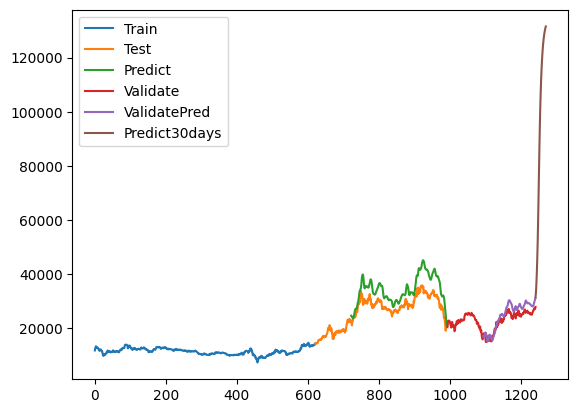

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()